In [1]:
# Pandas library for the pandas dataframes
import pandas as pd    
import numpy as np

# Import Scikit-Learn library for decision tree models
import sklearn         
from sklearn import linear_model, datasets
from sklearn.utils import resample
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix


# Import plotting libraries
import seaborn as sns
import matplotlib 
from matplotlib import pyplot as plt


# Set larger fontsize for all plots
matplotlib.rcParams.update({'font.size': 18})
from IPython.display import clear_output

# Command to automatically reload modules before executing cells
# not needed here but might be if you are writing your own library 
%load_ext autoreload
%autoreload 2

# Import cleaning and splitting functions
from clean_split_data import clean_data
from clean_split_data import split_data

### Data

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data = clean_data(data)
X_train, X_test, y_train, y_test = split_data(data)

### Classifier

In [4]:
# Default criterion is GINI index
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
clf_bag = BaggingClassifier(base_estimator=classifier, n_estimators=50, random_state=42)
clf_bag = clf_bag.fit(X_train, y_train)

### Bagging Prediction (User Input)

In [5]:
def predict(test_data):
    '''
    Takes test data and uses classifier to predict boolean output.
    '''
    y_bag = clf_bag.predict(X_test)
    
    return y_bag

### Sample Train, Test, Split Results

In [6]:
def sample_results():
    '''
    Returns the results and confusion matrix of the sample dataset from Breast Cancer Wisconsin Dataset.
    '''
    y_bag = clf_bag.predict(X_test)
    print("Mean accuracy on test set", clf_bag.score(X_test, y_test))
    print("Accuracy score", accuracy_score(y_test, y_bag))
    print("The confusion matrix for the sample dataset using bagging decision trees is displayed below: ")
    plot_confusion_matrix(clf_bag, X_test, y_test)
    plt.show()
    
    return

Mean accuracy on test set 0.9298245614035088
Accuracy score 0.9298245614035088
The confusion matrix for the sample dataset using bagging decision trees is displayed below: 


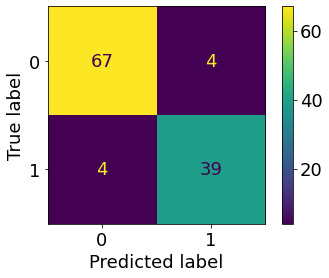

In [7]:
sample_results()